# 3.1  Introduction
- Handwritten digit recognition is a common image recognition task where computers recognize text in handwriting images. Different from printed fonts, handwriting of different people has different sizes and styles, making it difficult for computers to recognize handwriting.
- This chapter describes the basic process of TensorFlow computing and basic elements for building a network.

#  3.2  Objectives
- Upon completion of this task, you will be able to:
  - Master the basic process of TensorFlow computing.
  - Be familiar with the basic elements of network building, including dataset, network model building, model training, and model validation.

# 3.3  Experiment Steps
- This experiment involves the following steps:
  - Reading the MNIST handwritten digit dataset.
  - Getting started with TensorFlow by using simple mathematical models.
  - Implementing softmax regression by using high-level APIs.
  - Visualizing prediction results.
## 3.3.1  Project Description and Dataset Acquisition
### 3.3.1.1  Description
- This project applies deep learning and TensorFlow tools to train and build models based on the MNIST handwriting dataset.
### 3.3.1.2  Data Acquisition and Processing
#### 3.3.1.2.1  About the Dataset
- The MNIST dataset is provided by the National Institute of Standards and Technology (NIST).
- The dataset consists of handwritten digits from 250 individuals, of which 50% are high school students and 50% are staff from Bureau of the Census.
- You can download the dataset from http://yann.lecun.com/exdb/mnist/, which consists of the following parts:
  - Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB after decompression, including 60,000 samples)
  - Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB after decompression, including 60,000 labels)
  - Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB after decompression, including 10,000 samples)
  - Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB after decompression, including 10,000 labels)
- The MNIST dataset is an entry-level computer vision dataset that contains images of various handwritten digits.

- It also contains one label for each image, to clarify the correct digit. For example, the labels for the preceding four images are 5, 0, 4, and 1.
#### 3.3.1.2.2  MNIST Dataset Reading
- Download the MNIST dataset directly from the official TensorFlow website and decompress it.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# dataset.mnist pode ser baixado direto 
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(y_train_raw[0])  # primeira saída do treino
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

11493376/11490434 [==============================] - 0s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# Convert the labels into one-hot codes.
# problema de classificação pra uma quantidade de categorias que vc definir 'num_classes'
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])  # saída em forma de classificação

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


- In the MNIST dataset, the images are a tensor in the shape of [60000, 28, 28]. The first dimension is used to extract images, and the second and third dimensions are used to extract pixels in each image. Each element in this tensor indicates the strength of a pixel in an image. The value ranges from 0 to 255.
- Label data is one-hot vectors. In a one-hot vector, one digit is 1, and digits in other dimensions are all 0s. For example, label 1 may be represented as [0,1,0,0,0,0,0,0,0,0,0,0]. Therefore, the labels are a digital matrix of [60000, 10].

## 3.3.2  Dataset Preprocessing and Visualization
### 3.3.2.1  Data Visualization
- Draw the first nine images.

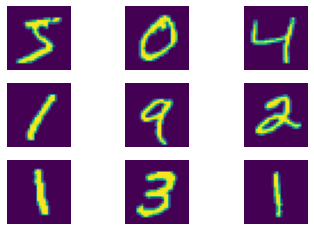

In [4]:
# plotando as 9 primeiras entradas de treino
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_raw[i])
    # plt.ylabel(y[i].numpy())
    plt.axis("off")
plt.show()

### 3.3.2.2  Data Preprocessing
- An output of a fully connected network must be in the form of vector, instead of the matrix form of the current images. Therefore, you need to sort the images into vectors.

In [5]:
# Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)  # a entrada será um vetor com 60000 images de tamanho 784 (= 28*28)
x_test = x_test_raw.reshape(10000, 784)  # o mesmo para o teste

- Currently, the dynamic range of pixels is 0 to 255. Image pixels are usually normalized to the range of 0 to 1 during processing of image pixel values.

In [6]:
# Normalize image pixel values.
x_train = x_train.astype("float32") / 255  # 255 é a quantidade máxima de pixels
x_test = x_test.astype("float32") / 255

## 3.3.3  DNN Construction
### 3.3.3.1  Building a DNN Model

In [7]:
# Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
'''
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", input_dim=784),
        layers.Dense(256, activation="relu"),
        layers.Dense(124, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
'''
model = keras.Sequential([
    keras.Input(shape=(784,)),  # input layer (1) - invariável
    keras.layers.Dense(512, activation='relu'),  # hidden layer (1)
    keras.layers.Dense(256, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(124, activation='relu'),  # hidden layer (3)
    keras.layers.Dense(num_classes, activation='softmax') # output layer (4)  - invariável
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


- layer.Dense() indicates a fully connected layer, and activation indicates a used activation function.

### 3.3.3.2  Compiling the DNN Model

In [9]:
Optimizer = optimizers.Adam(0.001)  # neste exemplos, estamo especificando uma taxa de aprendizagem
model.compile(
    loss=keras.losses.categorical_crossentropy,  # função de perda 'crossentropia categórica'
    optimizer=Optimizer,
    metrics=["accuracy"],
)

- In the preceding example, the loss function of the model is cross entropy, and the optimization algorithm is the Adam gradient descent method.

### 3.3.3.3  Training the DNN Model

In [10]:
# Fit the training data to the model by using the fit method.
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)  # como temos muitos dados, separamos em batchs, 128 linhas de cada vez

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2319 - accuracy: 0.9319
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0835 - accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0566 - accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0376 - accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0166 - accuracy: 0.9943
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0158 - accura

- Epoch indicates a specific round of training. In the preceding example, full data is iterated for 10 times.

### 3.3.3.4  Evaluating the DNN Model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])  # 97% de acerto nos dados de teste

Test loss: 0.10054995864629745
Test accuracy: 0.9764000177383423


- The evaluation shows that the model accuracy reaches 0.87, and 10 training iterations have been performed.
### 3.3.3.5  Saving the DNN Model

In [12]:
# salvando o modelo criado
import os
os.makedirs('mnist_model', exist_ok=True)
model.save("./mnist_model/final_DNN_model.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


prediction results of the first 30 images:
first 30 images in the test set:


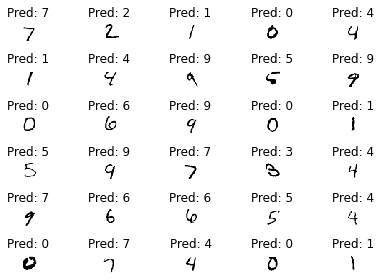

In [13]:
# Visualize test set output results.
import matplotlib.pyplot as plt

%matplotlib inline
def res_Visual(n):
    final_opt_a = model.predict_classes(x_test)  # Perform predictions on the test set by using the model.
    fig, ax = plt.subplots(nrows=int(n / 5), ncols=5)
    ax = ax.flatten()
    print("prediction results of the first {} images:".format(n))
    for i in range(n):
        # Visualize image display.
        img = x_test[i].reshape((28, 28))  # Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap="Greys", interpolation="nearest")  # Visualization
        ax[i].axis("off")
        ax[i].set_title(f"Pred: {final_opt_a[i]}")
    print("first {} images in the test set:".format(n))
    plt.tight_layout()


res_Visual(30)